## 1. Importing the Data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
#import scikit-learn as sci
import scanpy as sc
import matplotlib.pyplot as plt
import anndata as ad

In [2]:
sc.settings.verbosity = 3            
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
results_file = 'C:/Users/Schlumi/Desktop/IIIBiophysik21-22/Organoids/garcia_alonso_cell_atlas/write/pbmc3k.h5ad'  

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.20.1 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.9.1 pynndescent==0.5.5


In [3]:
adata_ti = sc.read_h5ad(
   'C:/Users/Schlumi/Desktop/IIIBiophysik21-22/Organoids/garcia_alonso_cell_atlas/endometrium_all.h5ad')  # the directory with the `.mtx` file                # use gene symbols for the variable names (variables-axis )                              # write a cache file for faster subsequent reading
adata_ti.var_names_make_unique()

adata_or = sc.read_h5ad(
   'C:/Users/Schlumi/Desktop/IIIBiophysik21-22/Organoids/garcia_alonso_cell_atlas/endometrium_organoid.h5ad')  # the directory with the `.mtx` file                # use gene symbols for the variable names (variables-axis )                              # write a cache file for faster subsequent reading
adata_ti.var_names_make_unique()

## 2. Subsetting the Samples:

### 2.1 Tissue samples:

In [4]:
adata_ti_pro_1 = adata_ti[adata_ti.obs["SampleID"] == "4861STDY7387181",:] #pro sample 1
adata_ti_pro_2 = adata_ti[adata_ti.obs["SampleID"] == "4861STDY7387182",:] #pro sample 2
adata_ti_sec_1 = adata_ti[adata_ti.obs["SampleID"] == "MRC_Endo8625698",:] #sec sample 1
adata_ti_sec_2 = adata_ti[adata_ti.obs["SampleID"] == "MRC_Endo8625699",:] #sec sample 2

data_list_ti = [adata_ti_pro_1, adata_ti_pro_2, adata_ti_sec_1, adata_ti_sec_2]

### 2.2 Organoid samples:

In [101]:
adata_or_1 = adata_or[adata_or.obs["sample_names"] == "WSSS_END9397520",:] #or sample 1
adata_or_2 = adata_or[adata_or.obs["sample_names"] == "WSSS_END9397522",:] #or sample 2
adata_or_3 = adata_or[adata_or.obs["sample_names"] == "WSSS_END9397528",:] #or sample 3

data_list_or = [adata_or_1, adata_or_2, adata_or_3]

## 3. Looking at each Sample using UMAPs:

### 3.1 Tissue Samples:

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:20)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:24)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


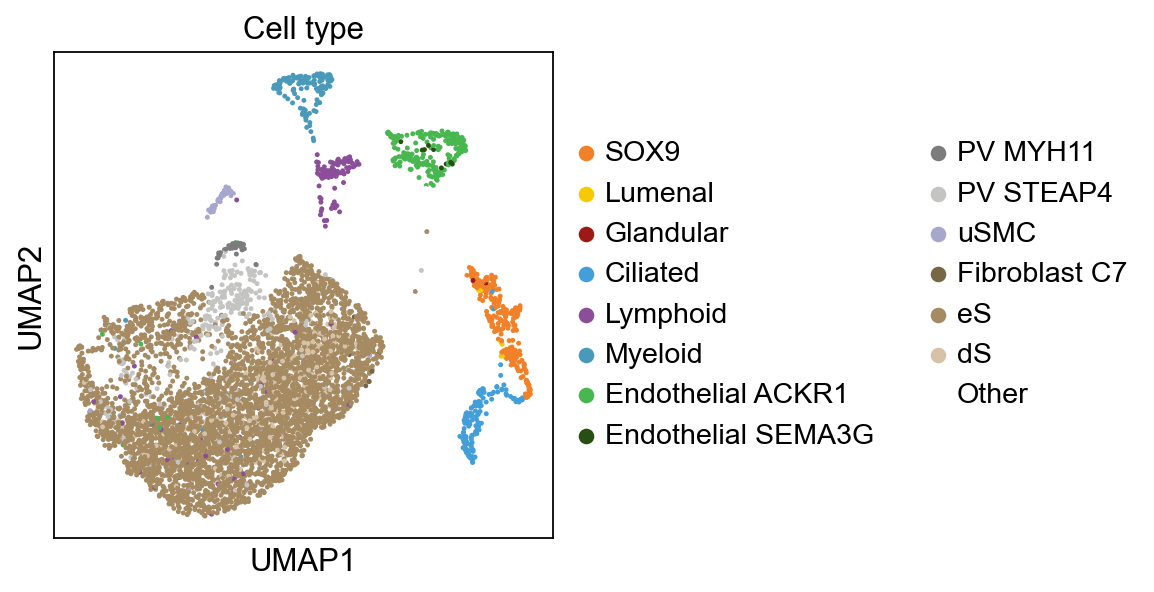

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:19)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:21)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:11)


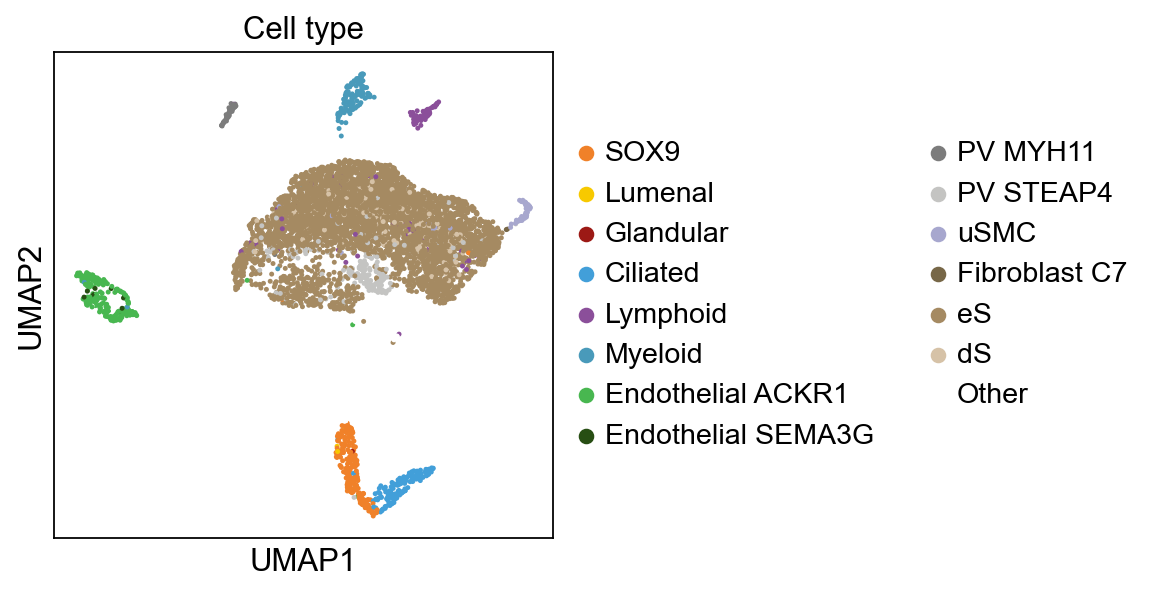

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:18)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:18)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


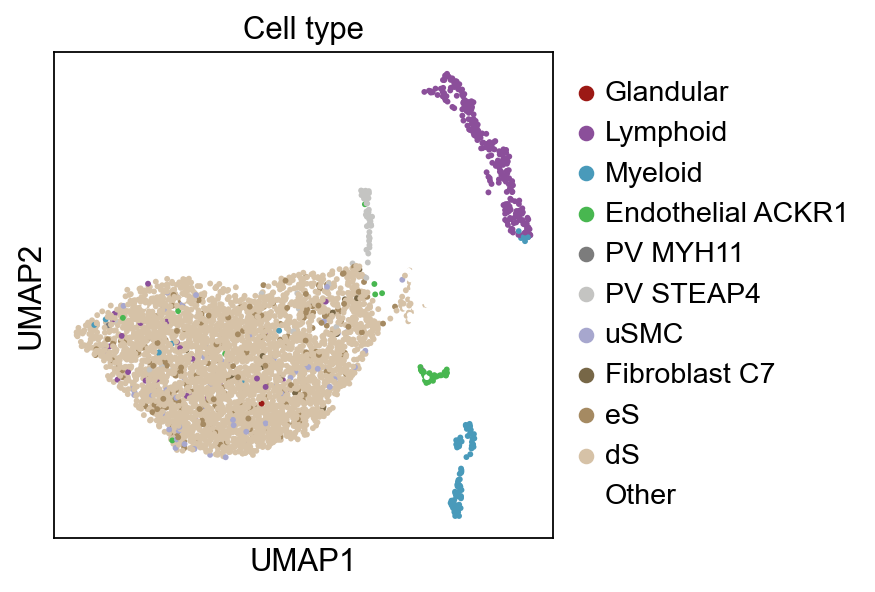

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:09)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:09)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)


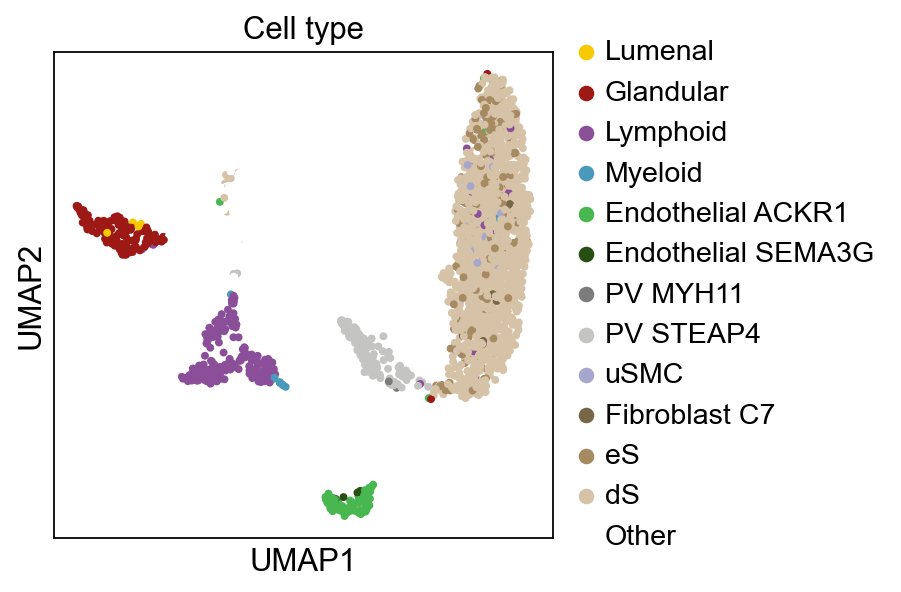

In [5]:
for item in data_list_ti:
    sc.pp.neighbors(item, n_neighbors=10, n_pcs=30)
    sc.tl.umap(item)
    sc.pl.umap(item, color="Cell type")

### 3.2 Organoid Samples:

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished (0:00:01)
computing UMAP
    finished (0:00:14)


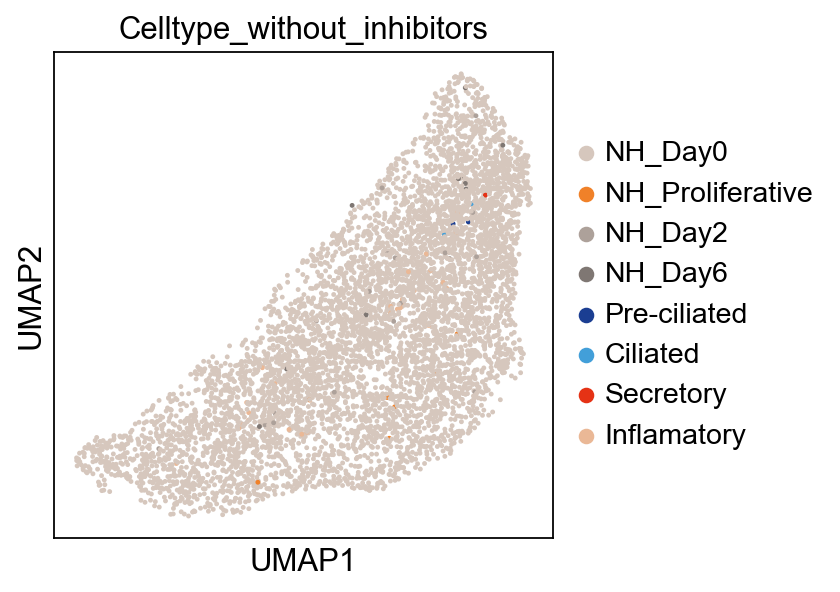

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished (0:00:00)
computing UMAP
    finished (0:00:10)


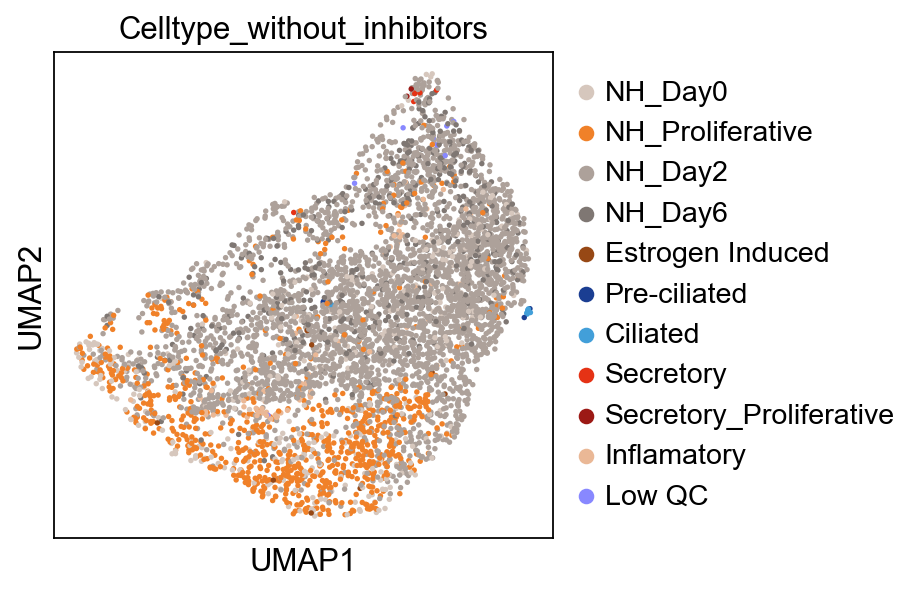

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished (0:00:01)
computing UMAP
    finished (0:00:14)


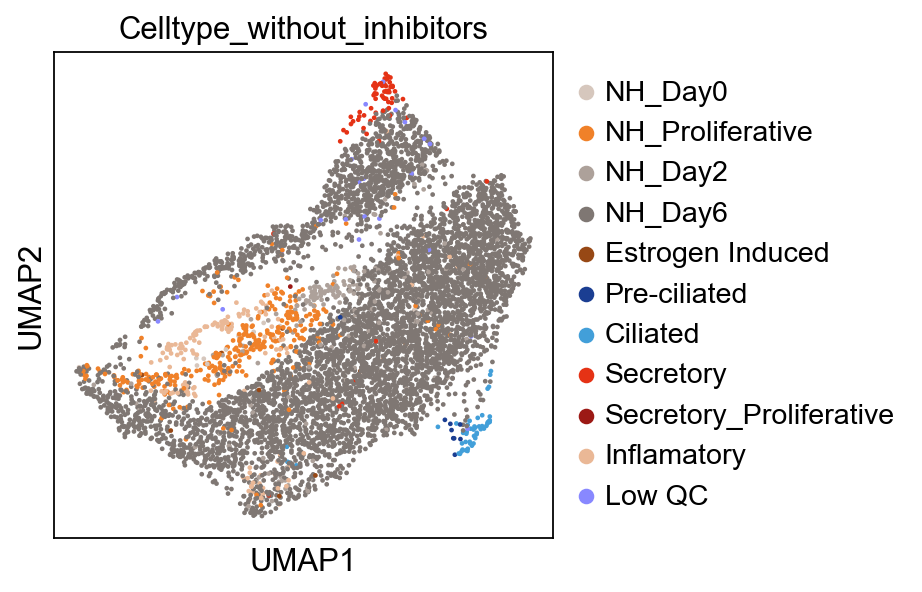

In [145]:
for item in data_list_or:
    sc.pp.neighbors(item, n_neighbors=10, n_pcs=30)
    sc.tl.umap(item)
    sc.pl.umap(item, color="Celltype_without_inhibitors")

## 4. Merge both Tissue and Organoid Samples + UMAPs:

### 4.1 Tissue Samples:

In [13]:
adata_ti_merged_pro = ad.concat([adata_ti_pro_1,adata_ti_pro_2], join="outer")
adata_ti_merged_sec = ad.concat([adata_ti_sec_1,adata_ti_sec_2], join="outer")

data_list_2 = [adata_ti_merged_pro, adata_ti_merged_sec]

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:14)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


... storing 'SampleID' as categorical


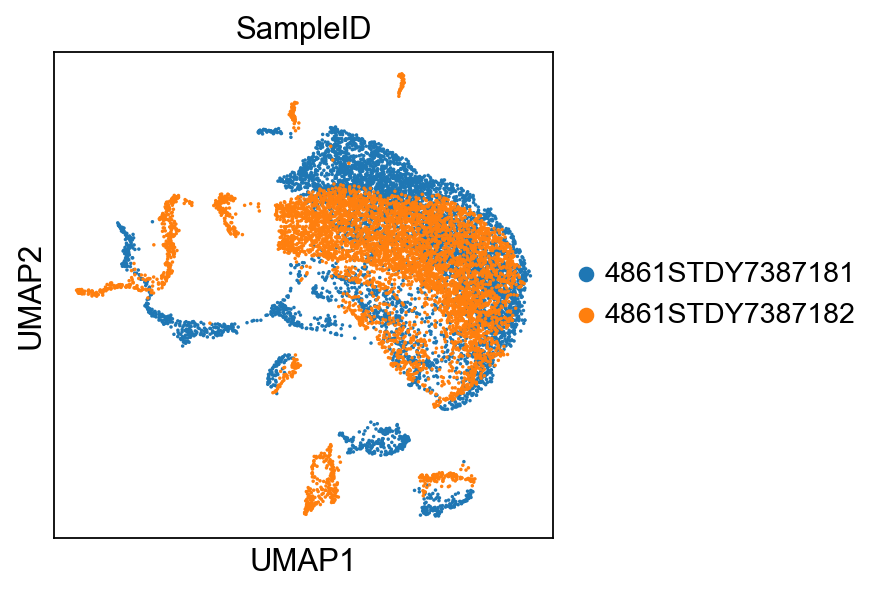

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)


... storing 'SampleID' as categorical
... storing 'Cell type' as categorical


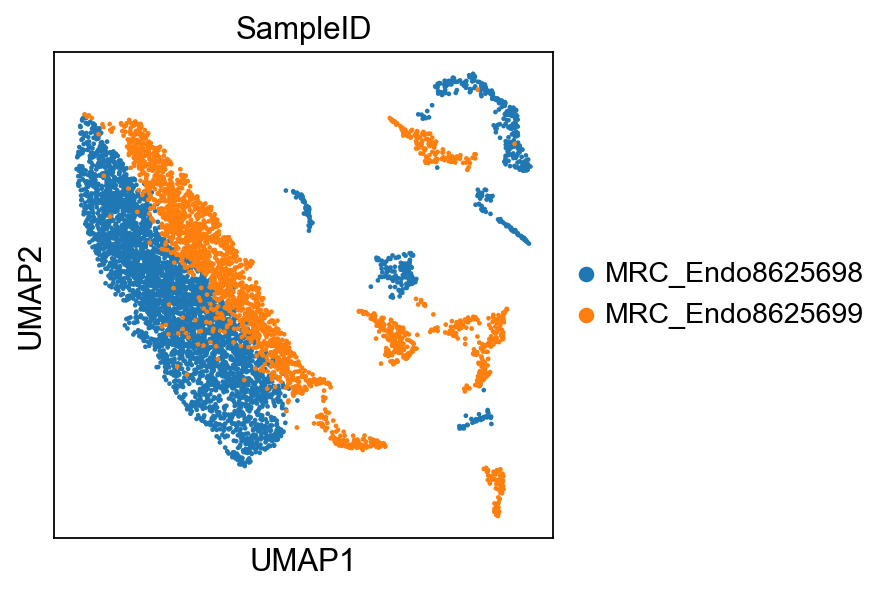

In [7]:
for item in data_list_2:
    sc.pp.neighbors(item, n_neighbors=10, n_pcs=30)
    sc.tl.umap(item)
    sc.pl.umap(item, color="SampleID")

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


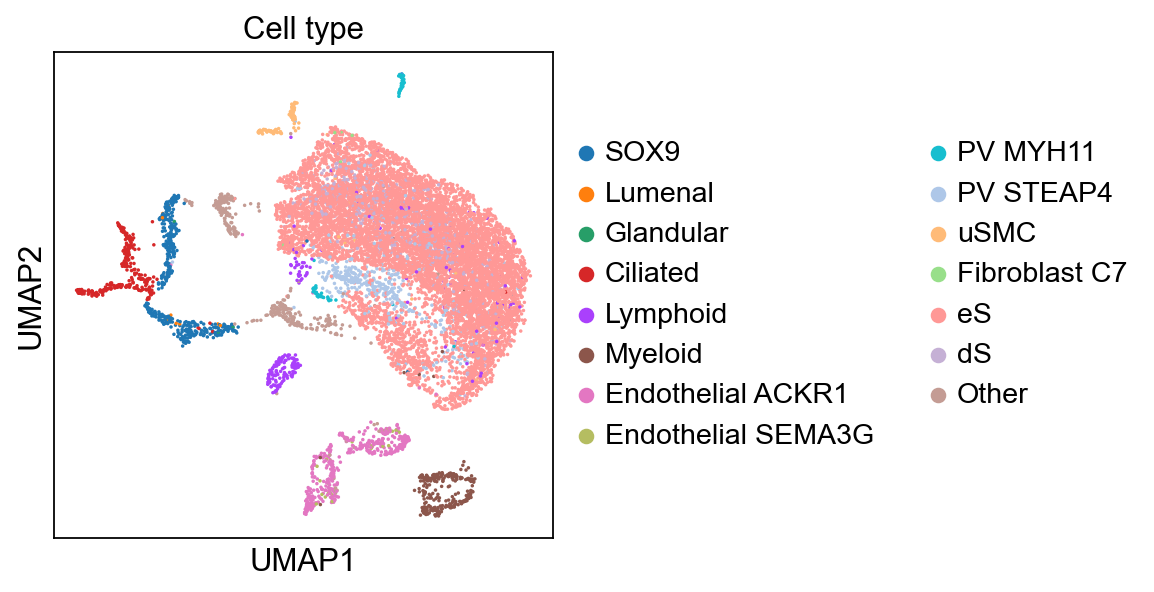

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:11)


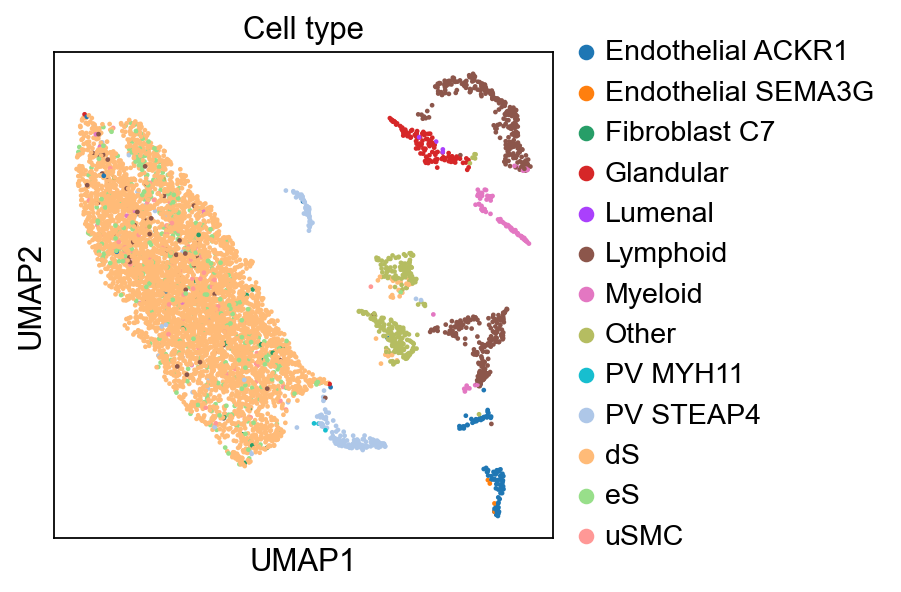

In [8]:
for item in data_list_2:
    sc.pp.neighbors(item, n_neighbors=10, n_pcs=30)
    sc.tl.umap(item)
    sc.pl.umap(item, color="Cell type")

### 4.2 Organoid samples:

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished (0:00:01)
computing UMAP
    finished (0:00:16)


... storing 'sample_names' as categorical
... storing 'Celltype_without_inhibitors' as categorical
... storing 'Celltype' as categorical


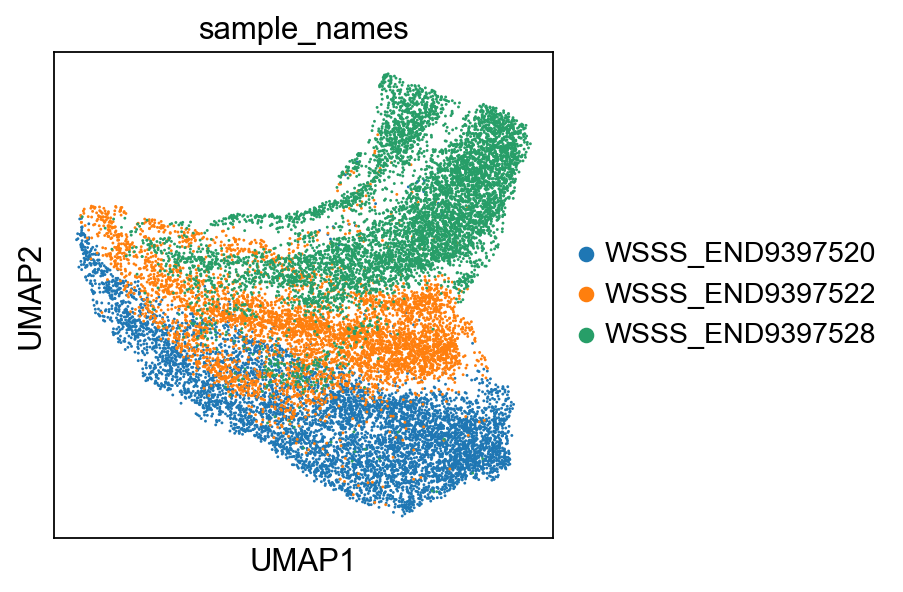

In [103]:
adata_or_merged = ad.concat([adata_or_1, adata_or_2, adata_or_3], join="outer")

sc.pp.neighbors(adata_or_merged, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata_or_merged)
sc.pl.umap(adata_or_merged, color="sample_names")

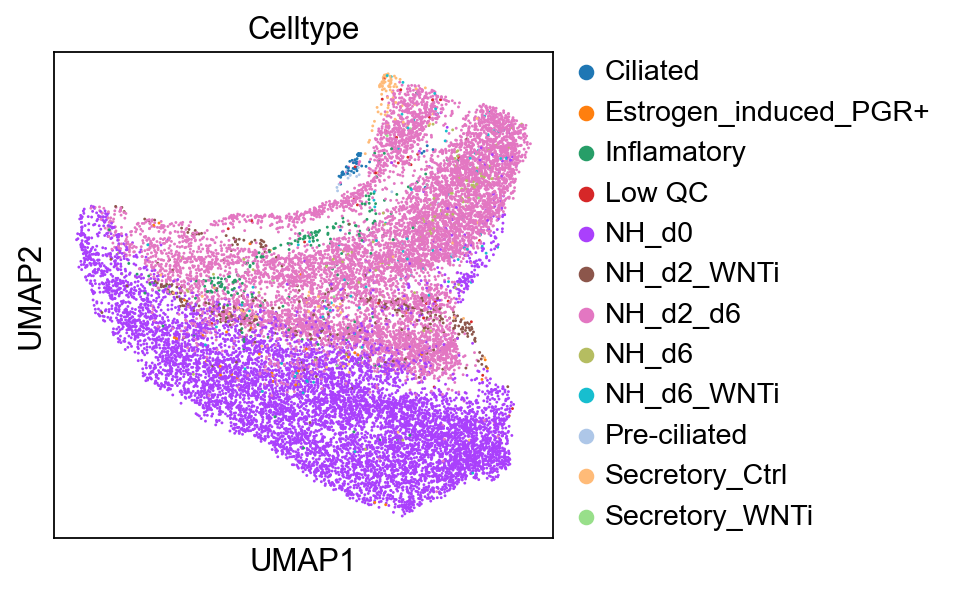

In [111]:
sc.pl.umap(adata_or_merged, color="Celltype")

## 5. Finding marker genes

ranking genes
    finished (0:00:12)


C:\Users\Schlumi\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


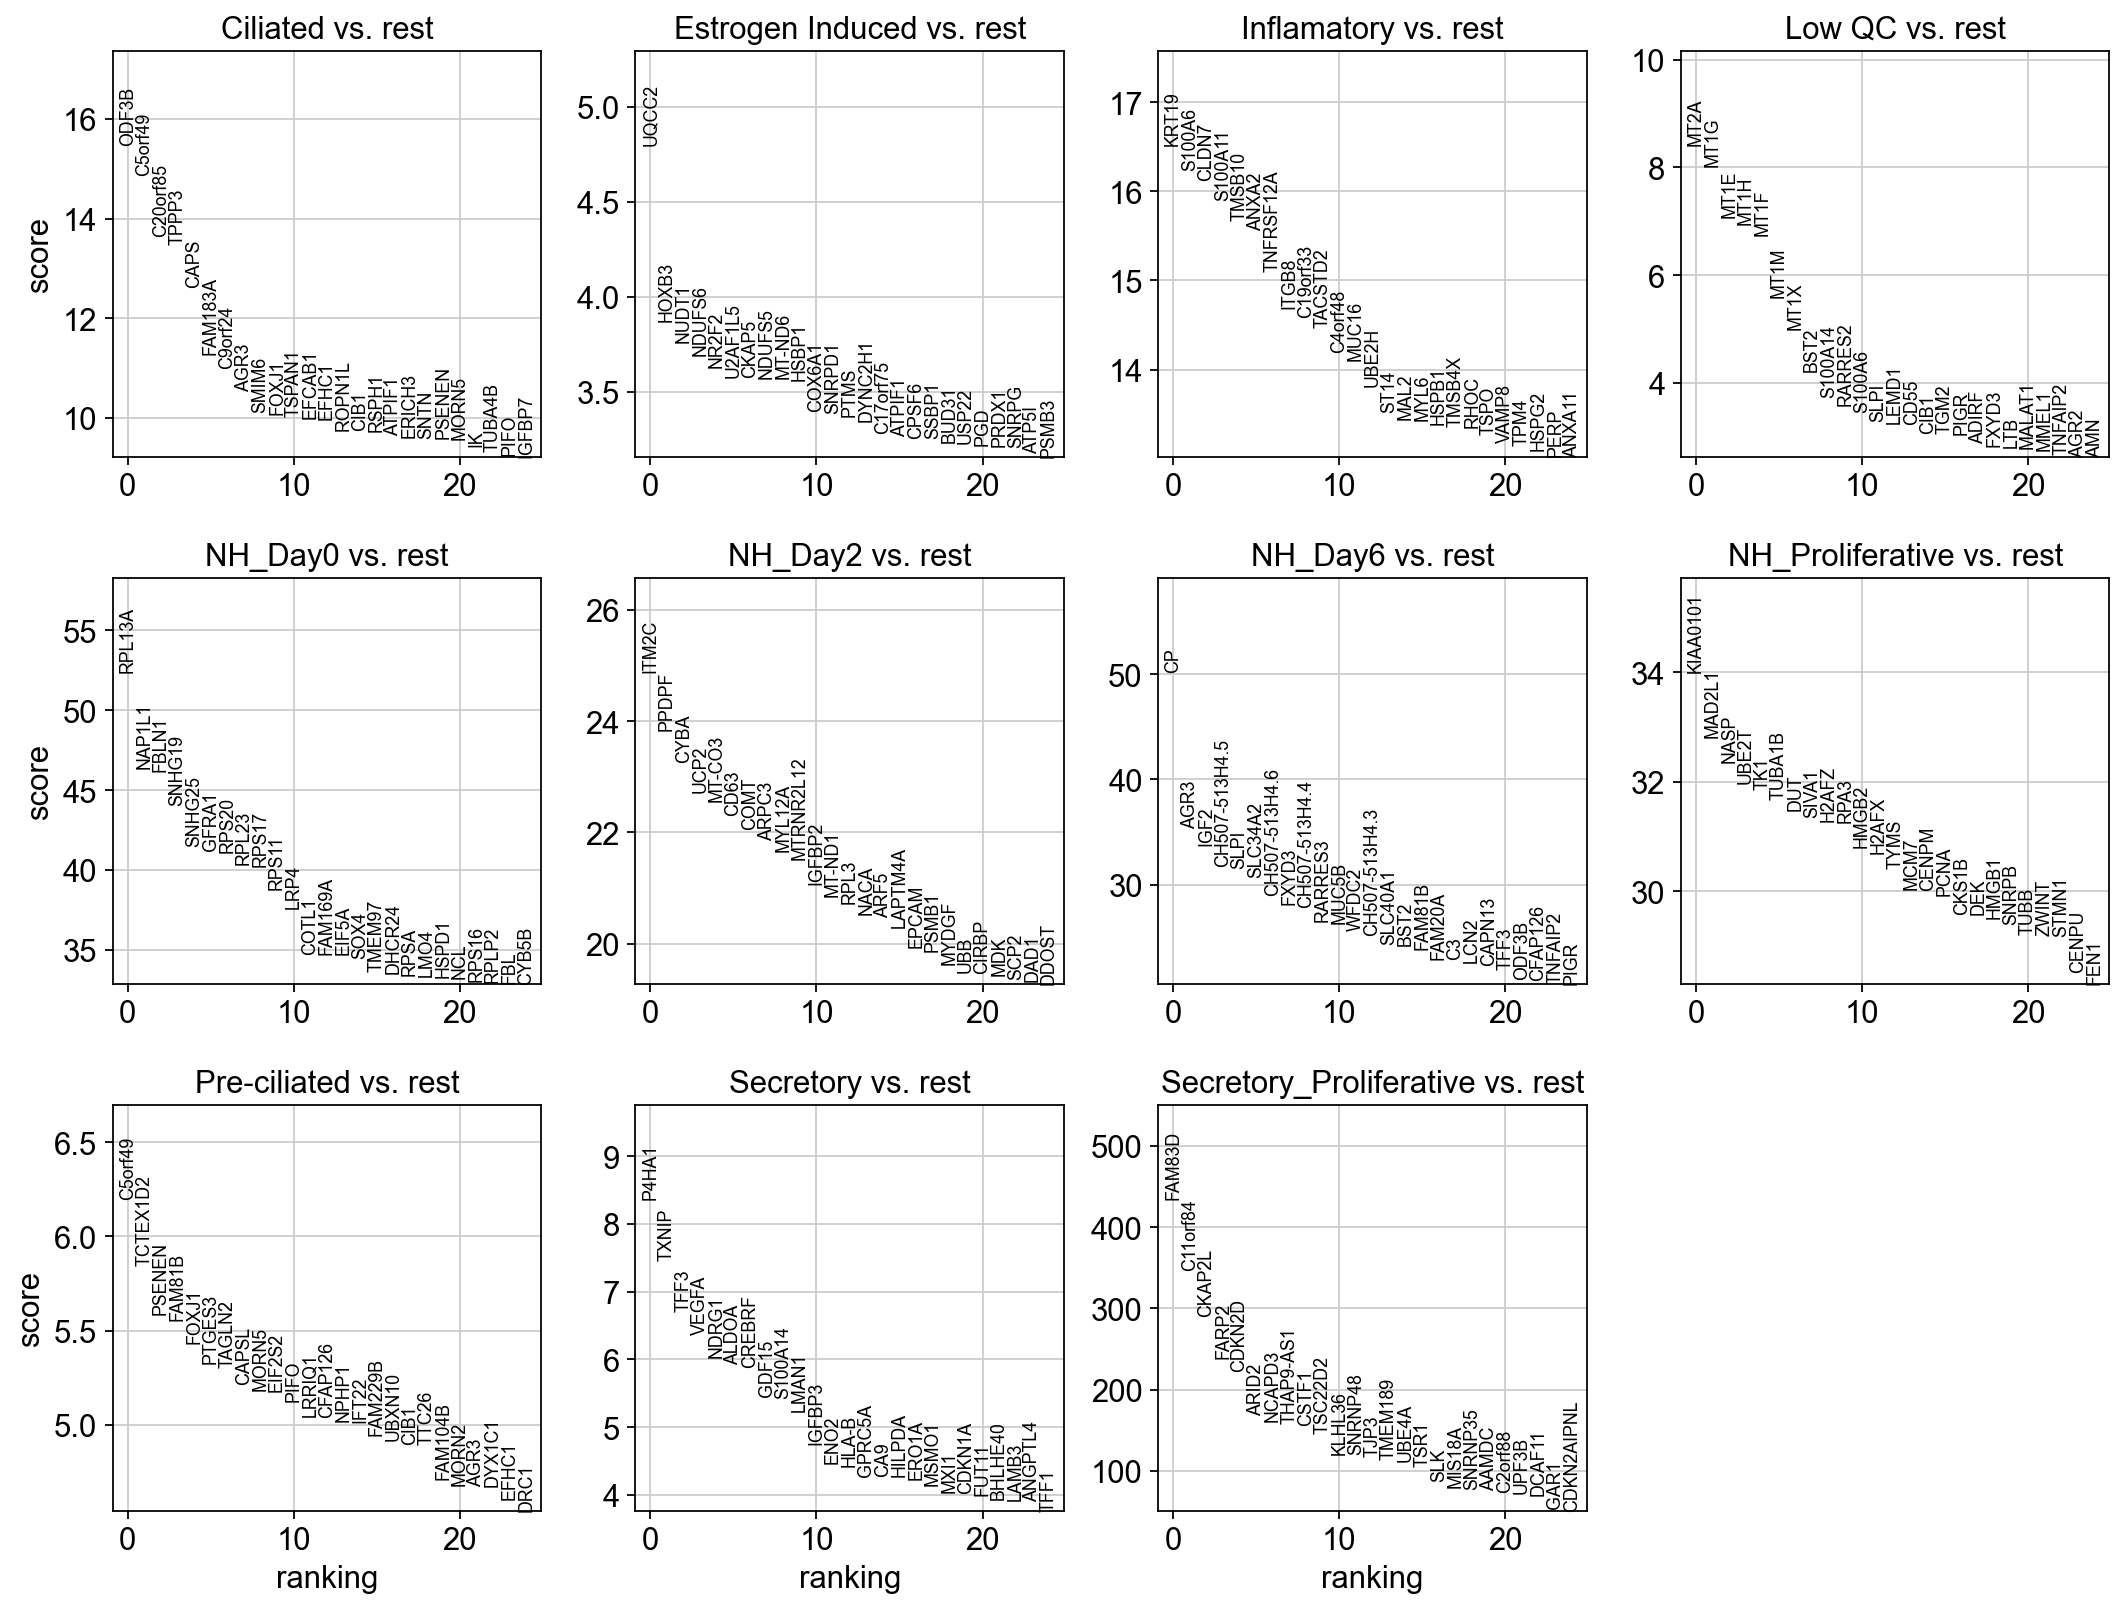

ranking genes
    finished (0:01:10)


C:\Users\Schlumi\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


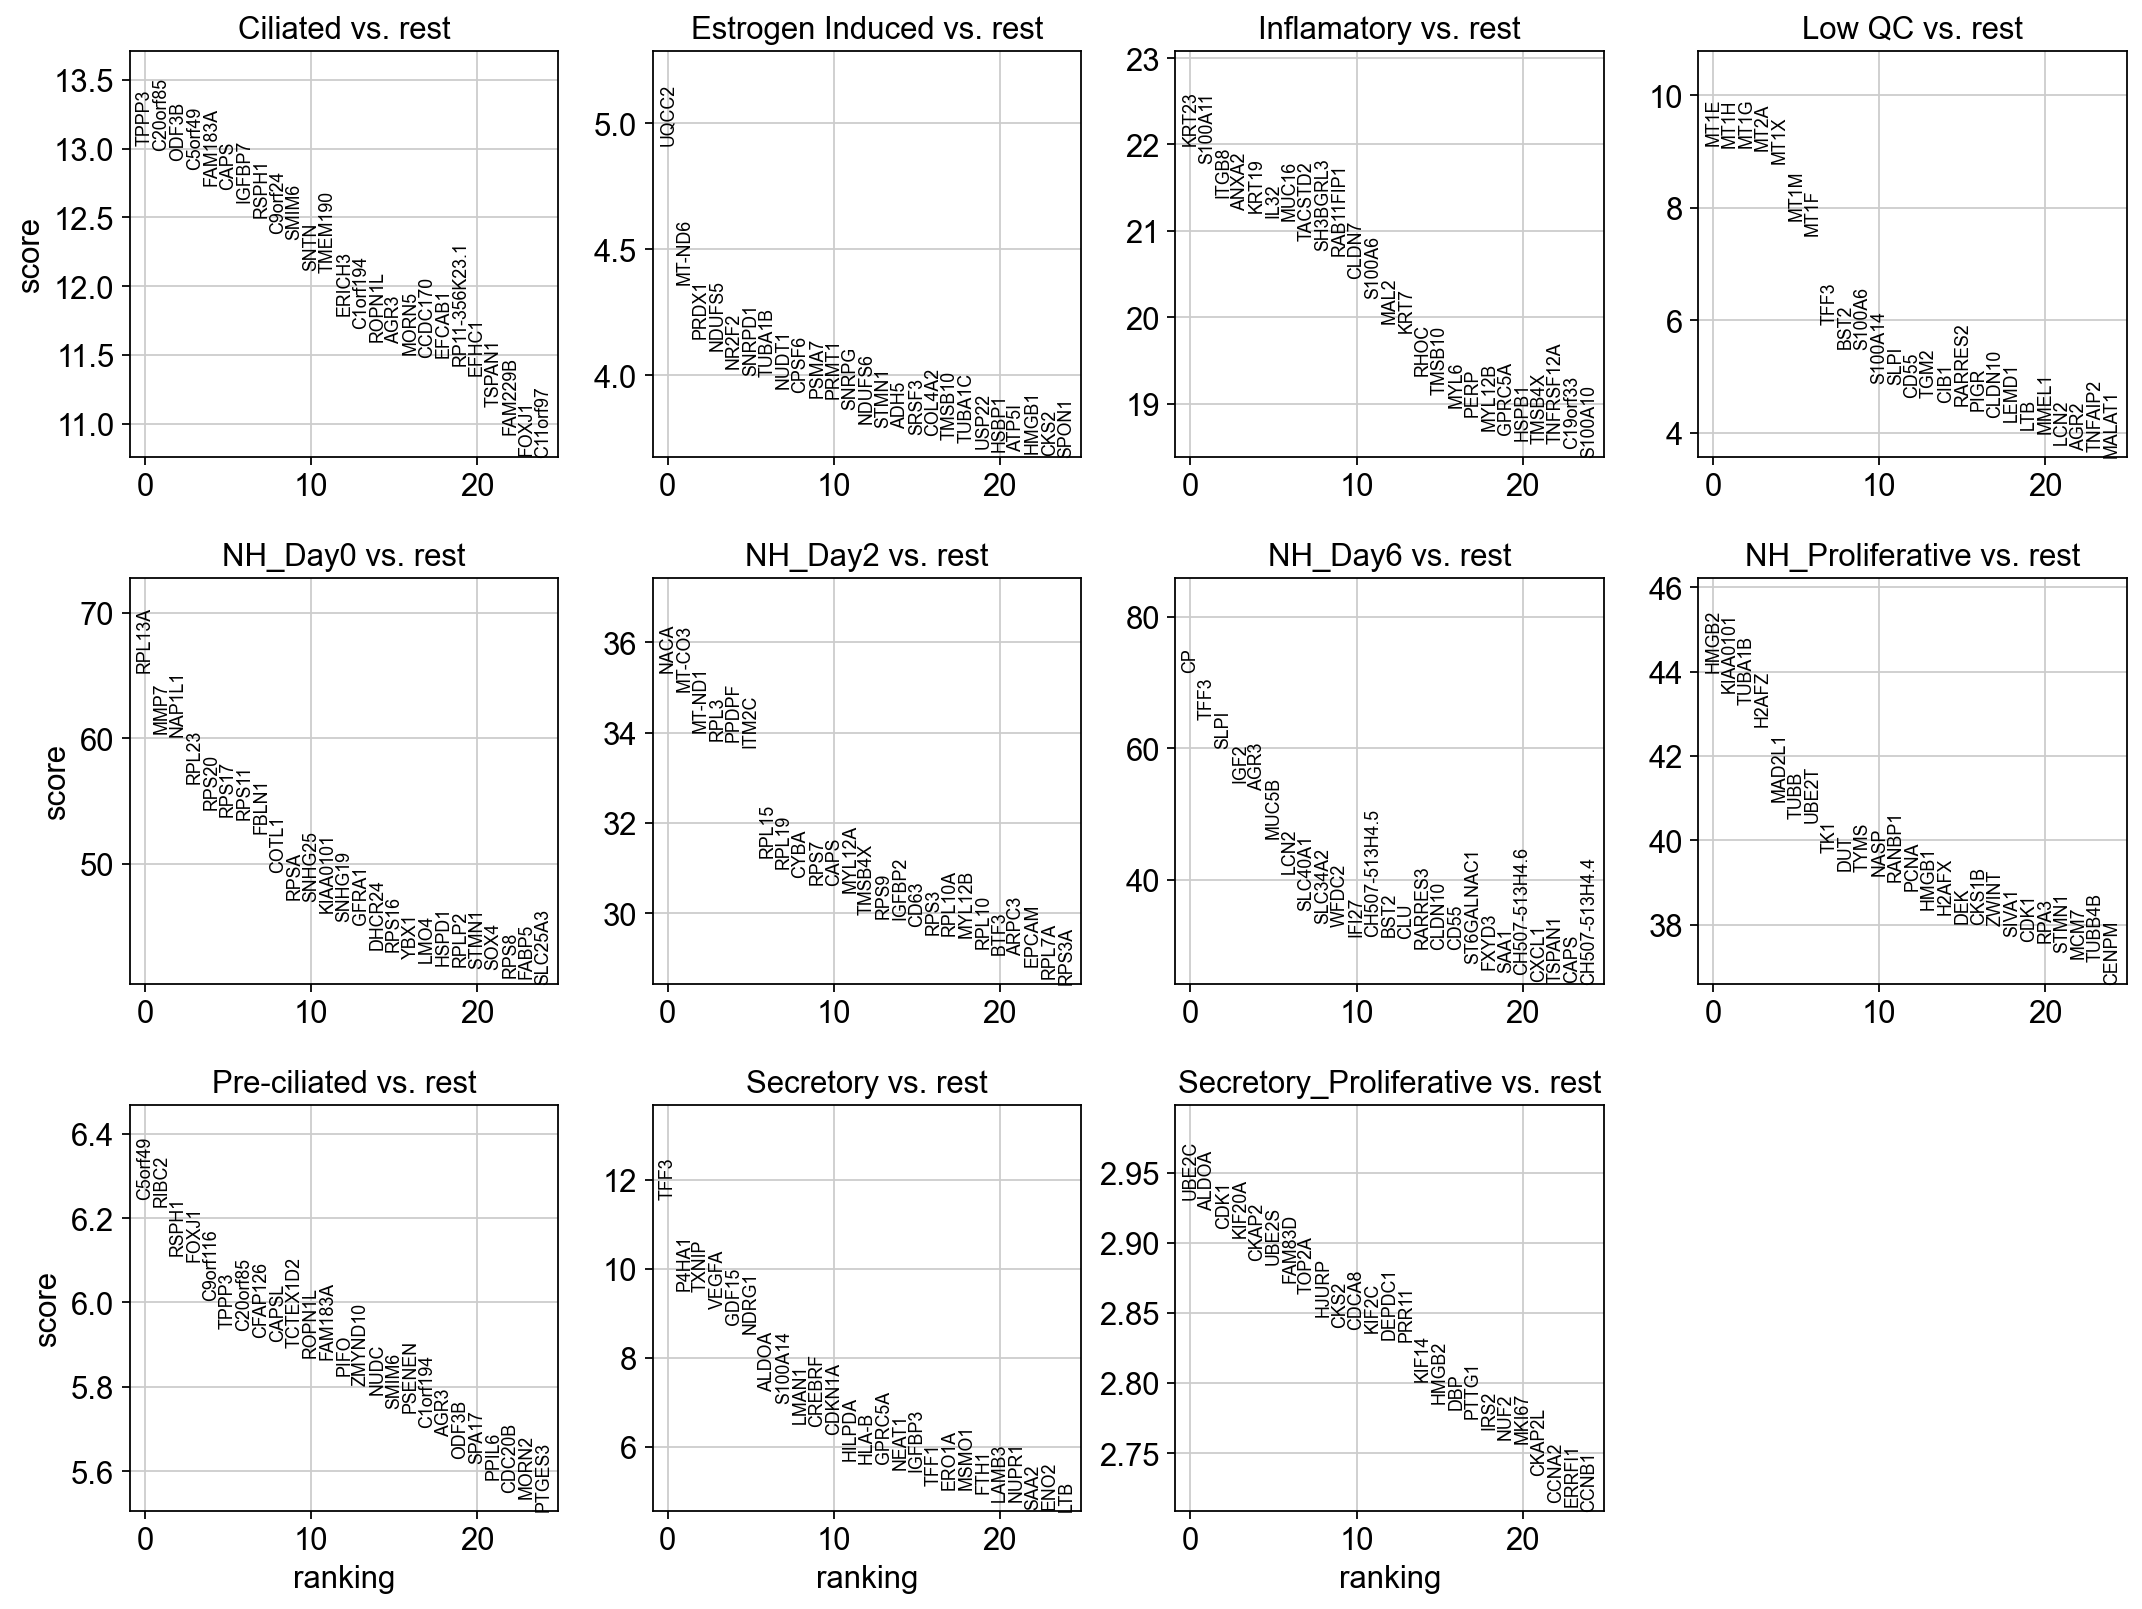

OSError: Unable to create file (unable to open file: name = 'C:\Users\Schlumi\Desktop\IIIBiophysik21-22\Organoids\garcia_alonso_cell_atlas\write\pbmc3k.h5ad', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 302)

In [114]:
sc.pp.log1p(adata_or_2)

    #t-test: compute a ranking for the highly differential genes in each cluster:

sc.tl.rank_genes_groups(adata_or_merged, 'Celltype_without_inhibitors', method='t-test')
sc.pl.rank_genes_groups(adata_or_merged, n_genes=25, sharey=False) #ln34

sc.settings.verbosity = 2  # reduce the verbosity #ln35

    #result of a Wilcoxon rank-sum test:

sc.tl.rank_genes_groups(adata_or_merged, 'Celltype_without_inhibitors', method='wilcoxon')
sc.pl.rank_genes_groups(adata_or_merged, n_genes=25, sharey=False) #ln36

adata_or_2.write(results_file) #ln37

    #rank genes using logistic regression:

sc.tl.rank_genes_groups(adata_or_merged, 'Celltype_without_inhibitors', method='logreg')
sc.pl.rank_genes_groups(adata_or_merged, n_genes=25, sharey=False) #ln38

In [115]:
    #show the 10 top ranked genes per cluster in a dataframe:

pd.DataFrame(adata_or_merged.uns['rank_genes_groups']['names']).head(10) #ln41

Ciliated Estrogen Induced Inflamatory  Low QC NH_Day0 NH_Day2  NH_Day6  \
0     TPPP3            UQCC2       KRT23    MT1E  RPL13A    NACA       CP   
1  C20orf85           MT-ND6     S100A11    MT1H    MMP7  MT-CO3     TFF3   
2     ODF3B            PRDX1       ITGB8    MT1G  NAP1L1  MT-ND1     SLPI   
3   C5orf49           NDUFS5       ANXA2    MT2A   RPL23    RPL3     IGF2   
4   FAM183A            NR2F2       KRT19    MT1X   RPS20   PPDPF     AGR3   
5      CAPS           SNRPD1        IL32    MT1M   RPS17   ITM2C    MUC5B   
6    IGFBP7           TUBA1B       MUC16    MT1F   RPS11   RPL15     LCN2   
7     RSPH1            NUDT1     TACSTD2    TFF3   FBLN1   RPL19  SLC40A1   
8   C9orf24            CPSF6    SH3BGRL3    BST2   COTL1    CYBA  SLC34A2   
9     SMIM6            PSMA7   RAB11FIP1  S100A6    RPSA    RPS7    WFDC2   

  NH_Proliferative Pre-ciliated Secretory Secretory_Proliferative  
0            HMGB2      C5orf49      TFF3                   UBE2C  
1         KIAA0101        RIBC2     P4HA1                   ALDOA  
2           TUBA1B        RSPH1     TXNIP                    CDK1  
3            H2AFZ        FOXJ1     VEGFA                  KIF20A  
4           MAD2L1     C9orf116     GDF15                   CKAP2  
5             TUBB        TPPP3     NDRG1                   UBE2S  
6            UBE2T     C20orf85     ALDOA                  FAM83D  
7              TK1      CFAP126   S100A14                   TOP2A  
8              DUT        CAPSL     LMAN1                   HJURP  
9             TYMS     TCTEX1D2    CREBRF                    CKS2

## 6. Comparing the merged Ti and Or Samples using Heatmaps:

In [157]:
adata_ti_merged = ad.concat([adata_ti_merged_pro,adata_ti_merged_sec], join="outer")

adata_pro_or_merged = ad.concat([adata_ti_merged_pro,adata_or_merged], join="outer")

adata_all_merged = ad.concat([adata_ti_merged_pro,adata_ti_merged_sec,adata_or_merged], join="outer")

KeyError: nan

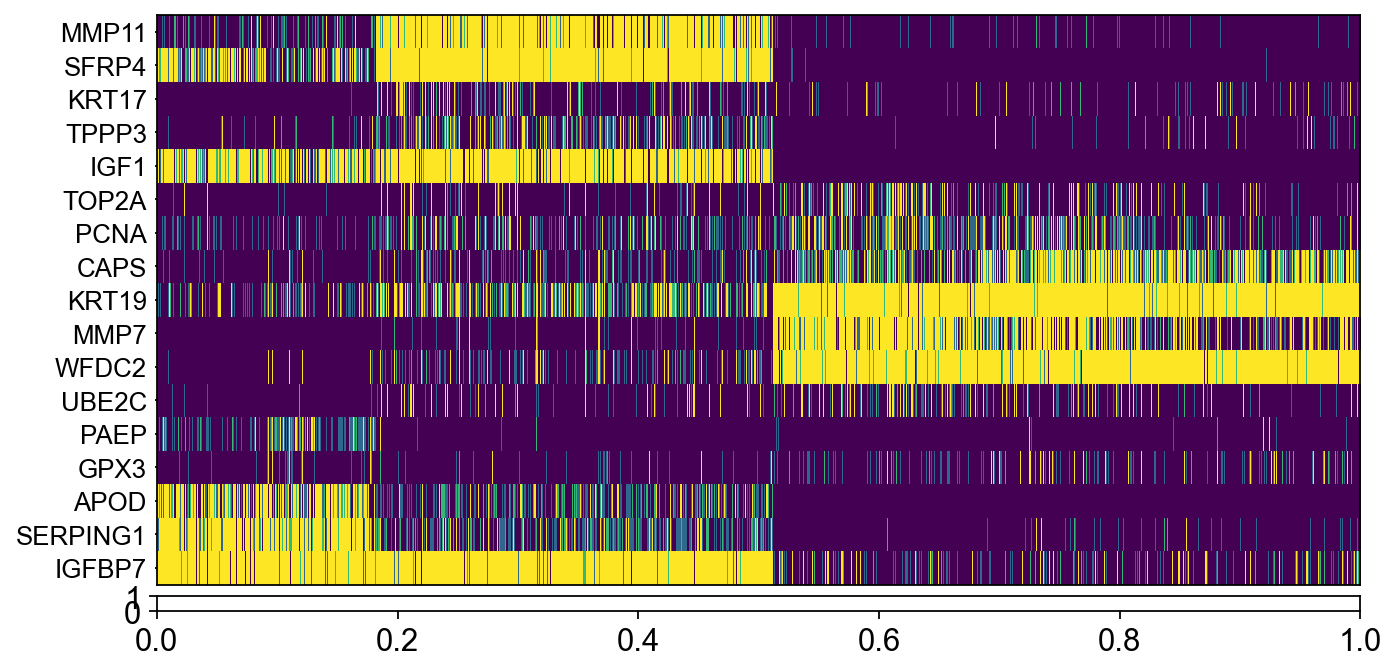

In [172]:
markers_menstrualflow = ['MMP1', 'MMP10', 'MMP3', 'MMP7', 'NCR3']
markers_proliferative = ['MMP11', 'SFRP4', 'KRT17', 'TPPP3', 'IGF1'] #eventuell: 'IGF1', 'IGFBP7'
markers_organoids = ['TOP2A', 'PCNA', 'CAPS', 'KRT19', 'MMP7', 'WFDC2', 'UBE2C']
markers_secretory = ['PAEP','GPX3', 'APOD', 'SERPING1', 'IGFBP7'] #gar nicht: 'KRT5', 'SCGB2A2'
#more_markers = ['ALDOA', 'CDK1', 'KIF20A', 'CKAP2', 'UBE2S', 'FAM83D', 'TOP2A', 'HJURP', 'CKS2']

markers = markers_proliferative + markers_organoids + markers_secretory

#adata_all_merged.obs['Stage'].cat.reorder_categories(['proliferative', 'late-secretory', 'organoid'], inplace = True)
sc.pl.heatmap(adata_all_merged, markers, groupby='Stage', swap_axes=True, vmax=3, cmap='viridis', figsize=[10,5])

ranking genes


... storing 'SampleID' as categorical
... storing 'DonorID' as categorical
... storing 'BiopsyType' as categorical
... storing 'Location' as categorical
... storing 'Binary Stage' as categorical
... storing 'Stage' as categorical
... storing 'Broad cell type' as categorical
... storing 'Cell type' as categorical
... storing 'demultiplexed' as categorical
... storing 'sample_names' as categorical
... storing 'Hormones' as categorical
... storing 'Inhibitor' as categorical
... storing 'Celltype_without_inhibitors' as categorical
... storing 'Celltype' as categorical


C:\Users\Schlumi\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


    finished (0:00:19)
    using 'X_pca' with n_pcs = 30
Storing dendrogram info using `.uns['dendrogram_Celltype']`


KeyError: nan

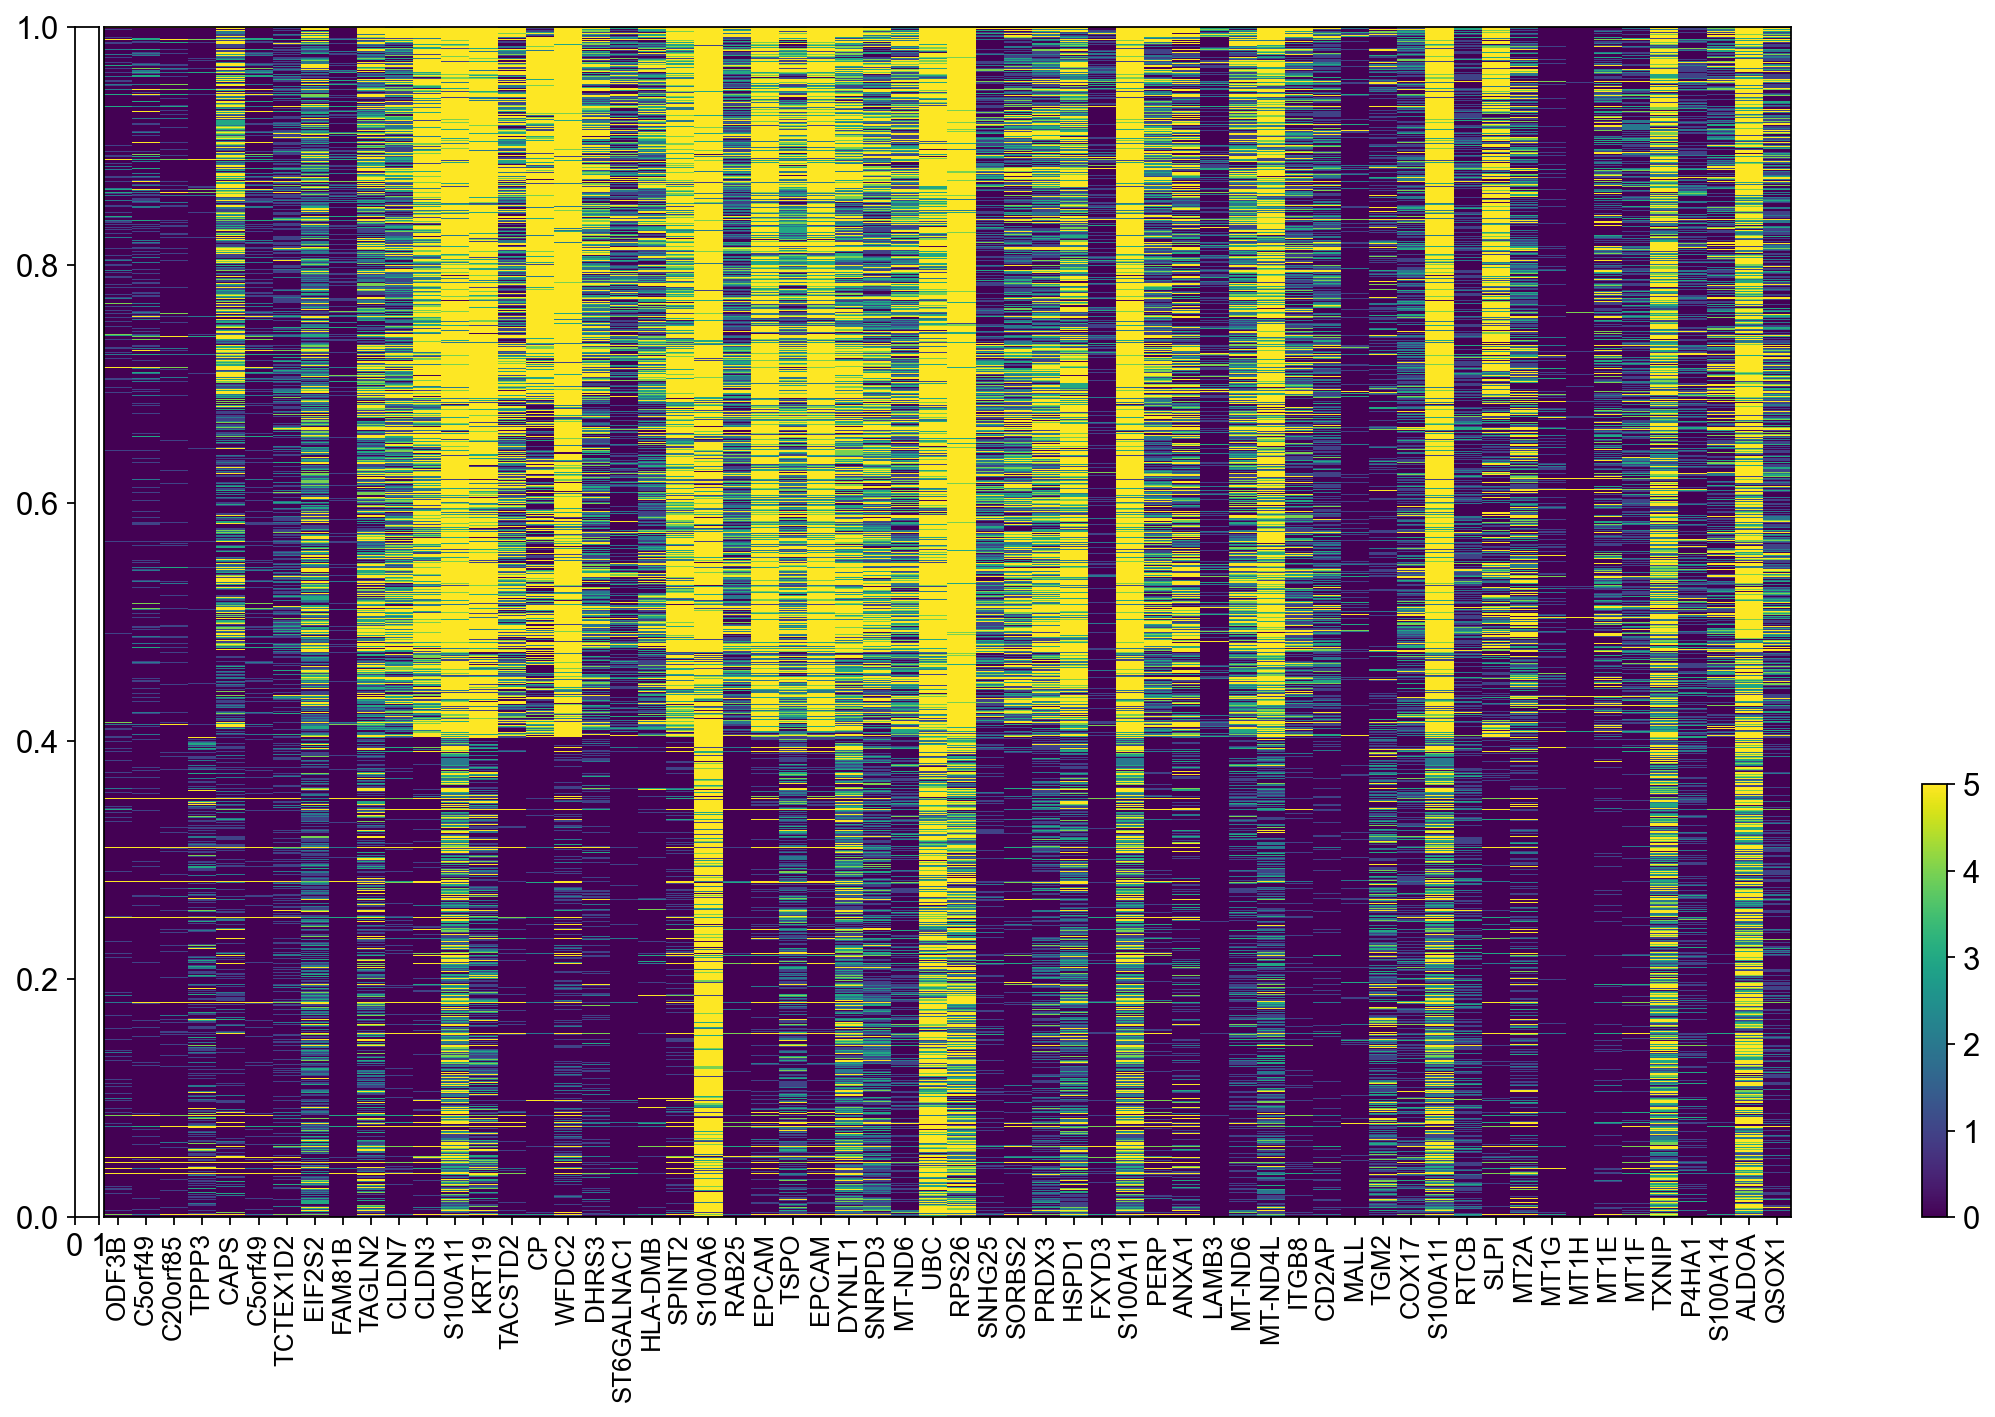

In [178]:
sc.tl.rank_genes_groups(adata_pro_or_merged, 'Celltype')
sc.pl.rank_genes_groups_heatmap(adata_pro_or_merged, n_genes=5, show_gene_labels=True, vmax=5, figsize=[15,10])

## 7. Comparing the merged Pro and Sec Samples using other plots:

In [ ]:
    #quick way to check the expression of genes

sc.pl.dotplot(adata, marker_genes, 'clusters', dendrogram=True)

## matrixplot

In [ ]:
sc.pl.matrixplot(adata, marker_genes, 'clusters', dendrogram=True, cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression')

# scale and store results in layer
pbmc.layers['scaled'] = sc.pp.scale(pbmc, copy=True).X

sc.pl.matrixplot(adata, marker_genes, 'clusters', dendrogram=True,
                 colorbar_title='mean z-score', layer='scaled', vmin=-2, vmax=2, cmap='RdBu_r')

## Heatmaps

In [ ]:
ax = sc.pl.heatmap(adata, marker_genes, groupby='clusters', cmap='viridis', dendrogram=True, swap_axes=True)

sc.pl.rank_genes_groups_heatmap(pbmc, n_genes=3, use_raw=False, swap_axes=True, vmin=-3, vmax=3, cmap='bwr', layer='scaled', figsize=(10,7), show=False);